In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
x_train,x_test=x_train/255.,x_test/255.

In [4]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes= 10)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=10)

In [5]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [6]:
x_train[0].shape

(28, 28)

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=10,verbose=2,shuffle=True)


Epoch 1/10
1875/1875 - 3s - loss: 0.2967 - accuracy: 0.9140 - val_loss: 0.1352 - val_accuracy: 0.9602 - 3s/epoch - 2ms/step
Epoch 2/10
1875/1875 - 3s - loss: 0.1426 - accuracy: 0.9571 - val_loss: 0.0941 - val_accuracy: 0.9730 - 3s/epoch - 1ms/step
Epoch 3/10
1875/1875 - 2s - loss: 0.1066 - accuracy: 0.9678 - val_loss: 0.0834 - val_accuracy: 0.9759 - 2s/epoch - 1ms/step
Epoch 4/10
1875/1875 - 2s - loss: 0.0891 - accuracy: 0.9720 - val_loss: 0.0785 - val_accuracy: 0.9750 - 2s/epoch - 1ms/step
Epoch 5/10
1875/1875 - 2s - loss: 0.0742 - accuracy: 0.9764 - val_loss: 0.0747 - val_accuracy: 0.9781 - 2s/epoch - 1ms/step
Epoch 6/10
1875/1875 - 2s - loss: 0.0659 - accuracy: 0.9794 - val_loss: 0.0724 - val_accuracy: 0.9795 - 2s/epoch - 1ms/step
Epoch 7/10
1875/1875 - 2s - loss: 0.0589 - accuracy: 0.9808 - val_loss: 0.0709 - val_accuracy: 0.9791 - 2s/epoch - 1ms/step
Epoch 8/10
1875/1875 - 2s - loss: 0.0523 - accuracy: 0.9827 - val_loss: 0.0711 - val_accuracy: 0.9793 - 2s/epoch - 1ms/step
Epoch 9/

In [11]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          normalize=False):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    complite : https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        
        plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")



    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    


In [12]:
    
ypred=model.predict(x_test).argmax(axis=1)  
ypred

313/313 [==============================] - 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

[[ 973    0    1    1    0    0    1    0    2    2]
 [   0 1119    4    1    0    2    2    0    6    1]
 [   3    0 1010    6    1    0    2    6    4    0]
 [   0    0    6  991    0    5    0    4    2    2]
 [   1    0    3    0  961    0    2    3    2   10]
 [   3    1    0    8    1  871    1    1    5    1]
 [   5    2    0    1    7    5  935    1    2    0]
 [   2    2    9    4    0    0    0 1006    2    3]
 [   5    0    1    3    4    1    0    2  953    5]
 [   0    2    0    7   11    4    0    7    1  977]]


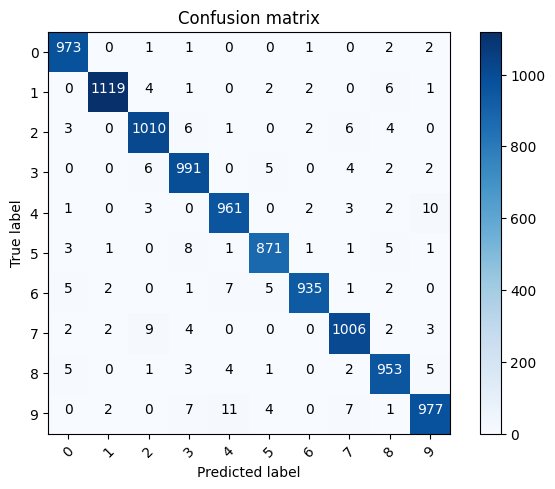

In [14]:
cm=confusion_matrix(y_test.argmax(axis=1) ,ypred)
plot_confusion_matrix(cm,[i for i in range(0,10)],normalize=False)

Text(0.5, 1.0, 'True label [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] is Predicted: 2')

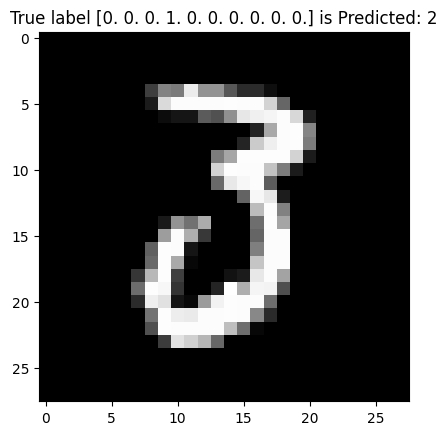

In [15]:
misclessified_idx= np.where(ypred!= y_test.argmax(axis=1))[0]
i=np.random.choice(misclessified_idx) 
plt.imshow(x_test[i], cmap='gray')
plt.title("True label %s is Predicted: %s" % (y_test[i], ypred[i]))


In [16]:
import cv2
a=plt.imread('Untitled.png')
gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
# img=cv2.resize(gray,(28,28))
# np.expand_dims(img,axis=0).shape
# np.argmax(model.predict(np.expand_dims(img,axis=0)))


ImportError: DLL load failed while importing cv2: Not enough memory resources are available to process this command.